### Importing libraries 

In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt

### Importing Data

In [107]:
df = pd.read_csv('../data/ytdataframe.csv')

dff = pd.read_csv(r'C:\Users\wled3\ytunlabeled2.csv')

In [108]:
df.head(1)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,subscribers,totalViews,totalVideos,avg polarity score,Label
0,0,-SejlHOXexc,Tech Tutorial,How to download facebook stories in your phone,Hey friends today we have another great topic ...,"['facebook stories in your phone', 'download f...",2019-11-02T14:25:35Z,969189,11109,NaN,338,PT3M55S,hd,False,140000,8665833,161,0.008202,non reputable


In [109]:
df = df.append(dff)

df.head(1)

C:\Users\wled3\AppData\Local\Temp\ipykernel_30952\4047219614.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)


,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,subscribers,totalViews,totalVideos,avg polarity score,Label
0,0,-SejlHOXexc,Tech Tutorial,How to download facebook stories in your phone,Hey friends today we have another great topic ...,"['facebook stories in your phone', 'download f...",2019-11-02T14:25:35Z,969189,11109,NaN,338,PT3M55S,hd,False,140000,8665833,161,0.008202,non reputable


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 86
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          232 non-null    int64  
 1   video_id            232 non-null    object 
 2   channelTitle        232 non-null    object 
 3   title               232 non-null    object 
 4   description         203 non-null    object 
 5   tags                187 non-null    object 
 6   publishedAt         232 non-null    object 
 7   viewCount           232 non-null    int64  
 8   likeCount           232 non-null    int64  
 9   favouriteCount      0 non-null      float64
 10  commentCount        232 non-null    int64  
 11  duration            232 non-null    object 
 12  definition          232 non-null    object 
 13  caption             232 non-null    bool   
 14  subscribers         232 non-null    int64  
 15  totalViews          232 non-null    int64  
 16  totalVide

# Data preprocessing 

Checking duplicates

In [111]:
df.duplicated().sum()


0

In [112]:
df = df.drop_duplicates()
df.shape

(232, 19)

Checking null values

In [113]:
df.isnull().sum()


Unnamed: 0              0
video_id                0
channelTitle            0
title                   0
description            29
tags                   45
publishedAt             0
viewCount               0
likeCount               0
favouriteCount        232
commentCount            0
duration                0
definition              0
caption                 0
subscribers             0
totalViews              0
totalVideos             0
avg polarity score      0
Label                  87
dtype: int64

Convert count columns to numeric

In [114]:
numeric_cols = ['viewCount', 'likeCount', 'commentCount']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

# dff[numeric_cols] = dff[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

Convert publish date to year

In [115]:
df['publishedAt'] = df['publishedAt'].apply(lambda x: parser.parse(x)) 
df['pushblishYear'] = df['publishedAt'].apply(lambda x: x.strftime("%Y"))

# dff['publishedAt'] = dff['publishedAt'].apply(lambda x: parser.parse(x)) 
# dff['pushblishYear'] = dff['publishedAt'].apply(lambda x: x.strftime("%Y"))

Convert duration to seconds

In [116]:
import isodate
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'].astype('timedelta64[s]')

# dff['durationSecs'] = dff['duration'].apply(lambda x: isodate.parse_duration(x))
# dff['durationSecs'] = dff['durationSecs'].astype('timedelta64[s]')

Add tag count

In [117]:


df['tagCount'] = df['tags'].apply(lambda x: 0 if x is np.nan else len(x))

# dff['tagCount'] = dff['tags'].apply(lambda x: 0 if x is np.nan else len(x))

Add title and description length

In [118]:
df['title length'] = df['title'].apply(lambda x: 0 if x is np.nan else len(x))
df['description length'] = df['description'].apply(lambda x: 0 if x is np.nan else len(x))

# dff['title length'] = dff['title'].apply(lambda x: 0 if x is np.nan else len(x))
# dff['description length'] = dff['description'].apply(lambda x: 0 if x is np.nan else len(x))


In [119]:
df['Label'] = df['Label'].apply(lambda x: 'Unlabeled' if x is np.nan else x)


Dropping columns we wont use

In [120]:
df = df.drop(['Unnamed: 0', 'description', 'title', 'publishedAt', 'duration', 'favouriteCount', 'video_id', 'tags'], axis=1)

# dff = dff.drop(['Unnamed: 0', 'description', 'title', 'publishedAt', 'duration', 'favouriteCount', 'video_id', 'tags'], axis=1)


# Modeling

In [121]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

Label encoding 

In [122]:
le = LabelEncoder()

df2 = ['channelTitle', 'definition', 'caption', 'Label']

df[df2] = df[df2].apply(le.fit_transform)

# dffs = ['channelTitle', 'definition', 'caption']
# dff[dffs] = dff[dffs].apply(le.fit_transform)

df.isnull().sum()

channelTitle          0
viewCount             0
likeCount             0
commentCount          0
definition            0
caption               0
subscribers           0
totalViews            0
totalVideos           0
avg polarity score    0
Label                 0
pushblishYear         0
durationSecs          0
tagCount              0
title length          0
description length    0
dtype: int64

Splitting

In [123]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()


feat_col = ['channelTitle', 'viewCount', 'likeCount', 'definition', 'commentCount', 'caption', 'subscribers', 'totalViews', 'totalVideos', 'avg polarity score', 'pushblishYear', 'durationSecs', 'tagCount', 'description length', 'title length']

X = df[feat_col] # Features
y = df['Label'] # Target variable

In [124]:
cols = X.columns

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [125]:
X = pd.DataFrame(X, columns=[cols])

X.head()

,channelTitle,viewCount,likeCount,definition,commentCount,caption,subscribers,totalViews,totalVideos,avg polarity score,pushblishYear,durationSecs,tagCount,description length,title length
0,0.65,0.119180,0.076033,0.0,0.063071,0.0,0.022875,0.021139,0.000459,0.000000,0.625,0.005040,0.643750,0.238839,0.357143
1,0.65,0.181936,0.081714,0.0,0.160478,0.0,0.022875,0.021139,0.000459,0.633859,0.500,0.006238,0.667188,0.086887,0.416667
2,0.65,0.067505,0.063040,0.0,0.062512,0.0,0.022875,0.021139,0.000459,0.627751,0.875,0.007144,0.490625,0.127528,0.511905
3,0.65,0.039784,0.036733,0.0,0.049636,0.0,0.022875,0.021139,0.000459,0.629724,0.500,0.003694,0.678125,0.067067,0.404762
4,0.65,0.005225,0.002197,0.0,0.004292,0.0,0.022875,0.021139,0.000459,0.629823,0.875,0.005725,0.537500,0.198599,0.511905


### K-Means model with two clusters

In [126]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=16) 

kmeans.fit(X)


KMeans(n_clusters=2, random_state=16)

### Model evaluation

In [127]:
kmeans.inertia_

115.60588591876184

Check quality of weak classification by the model

In [128]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 68 out of 232 samples were correctly labeled.
Accuracy score: 0.29


Use elbow method to find optimal number of clusters

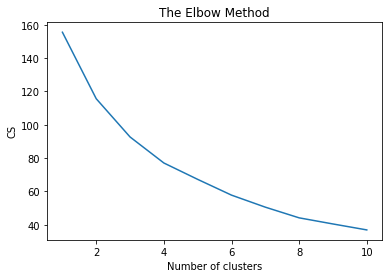

In [129]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 16)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Trying 3 clusters

In [130]:
kmeans = KMeans(n_clusters=3, random_state=16)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 41 out of 232 samples were correctly labeled.
Accuracy score: 0.18


Trying 4 clusters

In [131]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 78 out of 232 samples were correctly labeled.
Accuracy score: 0.34


# Save model

In [132]:
# import pickle

# pickle.dump(LP_knn, open('LP_knn_Model', 'wb'))